### Using RF Aug's
three seed

In [8]:
from fastai2.vision.all import *
import sys
sys.path.append('..')

%load_ext autoreload
%autoreload 2

from modules.expbuilder import default_params, run_exp

train_path = Path('../../../rf-chess-data/cropped_v1/')
train_path = Path('../../../rf-chess-data/cropped_v1.1/')
train_path_aug = Path('../../../rf-chess-data-aug/crop_v1/')

test_path_all = Path('../../../other-chess-data/regulation-test-2-all/')
test_path_easy = Path('../../../other-chess-data/regulation-test-2-easy/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### Run two demo runs

In [9]:
default_params

{'_expdesign_name': 'notnamed',
 '_condition_name': 'notnamed',
 '_train_name': 'rf-v1-crops',
 '_test_name': 'test-regulation-2-all',
 '_train_path': Path('../../../rf-chess-data/cropped_v1'),
 '_test_path': Path('../../../other-chess-data/regulation-test-2-all'),
 '_model_arch': <function torchvision.models.resnet.resnet50(pretrained=False, progress=True, **kwargs)>,
 '_fit_one_cycle_epochs': 10,
 '_fine_tune_epochs': 15,
 '_train_seed': 0,
 '_valid_pct': 0.2,
 '_rm_norm': False,
 '_learn_norm': False,
 '_mult': 1.0,
 '_max_lighting': 0.9,
 '_max_warp': 0.4,
 '_max_rotate': 20.0,
 '_resize_method': 'pad',
 '_pad_mode': 'reflection',
 '_bs': 32,
 '_p_lighting': 0.75,
 '_aug_re': False,
 '_re_params': {'p': 0.5,
  'sl': 0.0,
  'sh': 0.3,
  'min_aspect': 0.3,
  'max_count': 1},
 '_custom_crop': None,
 '_custom_train_fnames': None,
 '_custom_train_fnames_args': {}}

In [13]:
seeds = [0,1,2]

grid_params = [
    {'_expdesign_name': 'rf_aug',
     '_condition_name': 'simple-aug',
     '_test_name': 'test-regulation-2-easy',
     '_test_path': test_path_easy,
     '_train_path': train_path_aug,
     '_model_arch': resnet50,
      '_custom_crop': 'my-top-crop',
     '_fine_one_cycle_epochs': 4,
     '_fine_tune_epochs': 7,
     '_rm_norm': True,
     '_aug_re': False,
     '_re_params': {'p': 0.5,'sl': 0.0,'sh': 0.3,
                    'min_aspect': 0.3,'max_count': _max_count},
     '_train_seed': seed,
    }  
    for _max_count in (1,3)
    for seed in seeds]

In [14]:
grid_params

[{'_expdesign_name': 'rf_aug',
  '_condition_name': 'simple-aug',
  '_test_name': 'test-regulation-2-easy',
  '_test_path': Path('../../../other-chess-data/regulation-test-2-easy'),
  '_train_path': Path('../../../rf-chess-data-aug/crop_v1'),
  '_model_arch': <function torchvision.models.resnet.resnet50(pretrained=False, progress=True, **kwargs)>,
  '_custom_crop': 'my-top-crop',
  '_fine_one_cycle_epochs': 4,
  '_fine_tune_epochs': 7,
  '_rm_norm': True,
  '_aug_re': False,
  '_re_params': {'p': 0.5,
   'sl': 0.0,
   'sh': 0.3,
   'min_aspect': 0.3,
   'max_count': 1},
  '_train_seed': 0},
 {'_expdesign_name': 'rf_aug',
  '_condition_name': 'simple-aug',
  '_test_name': 'test-regulation-2-easy',
  '_test_path': Path('../../../other-chess-data/regulation-test-2-easy'),
  '_train_path': Path('../../../rf-chess-data-aug/crop_v1'),
  '_model_arch': <function torchvision.models.resnet.resnet50(pretrained=False, progress=True, **kwargs)>,
  '_custom_crop': 'my-top-crop',
  '_fine_one_cycle_

In [ ]:
for param in grid_params:
    
    run_params = default_params.copy()
    run_params.update(param)
    
    run_exp(run_params, 
            name_base='basicexp',
            b_msg=True, 
            b_cuda=True)

starting training...


In [ ]:
1+1

In [16]:
import os, sys
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import lines as mlines
from pathlib import Path

from modules.evalutils import get_dir_nums, get_tbls, param_diffs
from modules.evalutils import conj_plot_data

In [17]:
nums = get_dir_nums(log_dir='../models/model-logs/')

In [18]:
ret = get_tbls('basicexp', nums, log_dir='../models/model-logs')

d_metrics, d_resid, d_params = ret

In [19]:
cmp_param = '_expdesign_name'

In [20]:
exps_all = d_params[d_params['_expdesign_name'].isin(['rf_aug','re_aug'])].index

In [21]:
exp_params = d_params.T[exps_all]
param_diffs(exp_params)

_train_path                2
_fine_tune_epochs          2
_train_seed                3
model_fn                  15
_expdesign_name            2
_condition_name            5
_aug_re                    2
_fine_one_cycle_epochs     2
dtype: int64

In [22]:
tmp  = d_metrics.join(d_params[[cmp_param]], on='exp_name')

exp_metrics = tmp[tmp['exp_name'].isin(exps_all)]

In [23]:
exp_metrics['exp_name'].unique()

array(['basicexp-66', 'basicexp-67', 'basicexp-68', 'basicexp-69',
       'basicexp-70', 'basicexp-71', 'basicexp-72', 'basicexp-73',
       'basicexp-74', 'basicexp-75', 'basicexp-76', 'basicexp-77',
       'basicexp-78', 'basicexp-79', 'basicexp-80'], dtype=object)

In [24]:
d_params.loc[exps_all, '_test_path'].unique()

array(['../../../other-chess-data/regulation-test-2-easy'], dtype=object)

In [25]:
df_agg, color_ind = conj_plot_data(exp_metrics, cmp_param)

In [26]:
def foo(x): 
    if pd.isna(x):return 'blue'
    else: return x

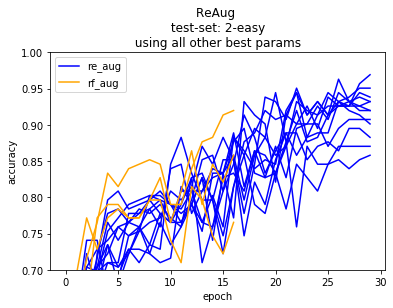

In [27]:
for i in range(df_agg.shape[0]):
    plt.plot(df_agg.T.iloc[:-1,i], 
             c=foo(df_agg.T.loc['color'][i]))
    
plt.title('ReAug \n test-set: 2-easy \n using all other best params ')
plt.ylabel('accuracy')
plt.xlabel('epoch')

handles = [mlines.Line2D([],[],c=foo(color)) 
           for color in color_ind.values ]
plt.legend(handles, [str(e) for e in color_ind.index])

axes = plt.gca()
axes.set_ylim([.7, 1.0]);

In [28]:
df_agg, color_ind = conj_plot_data(exp_metrics, cmp_param
                            ,values='test_loss')

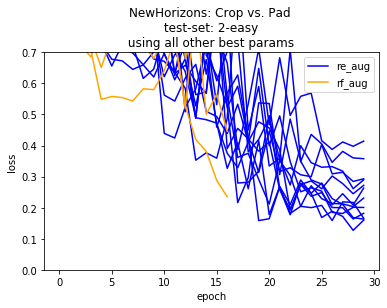

In [30]:
for i in range(df_agg.shape[0]):
    plt.plot(df_agg.T.iloc[:-1,i], 
             c=foo(df_agg.T.loc['color'][i]))
    
plt.title('NewHorizons: Crop vs. Pad \n test-set: 2-easy \n using all other best params ')
plt.ylabel('loss')
plt.xlabel('epoch')

handles = [mlines.Line2D([],[],c=foo(color)) 
           for color in color_ind.values ]
plt.legend(handles, [str(e) for e in color_ind.index])

axes = plt.gca()
axes.set_ylim([0.0, 0.7]);